In [442]:
import os #change directory
import pandas as pd #work on dataframe
import numpy as np # Work on null values
import matplotlib.pyplot as plt  #plot charts
import seaborn as sns

In [443]:
os.chdir('C:\\Users\\jaxer\\Downloads')  #Change directory

In [444]:
df= pd.read_csv('loan.csv') #import the dataset

C:\Python\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [445]:
# Find out the percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
id,id,0.000000
member_id,member_id,0.000000
loan_amnt,loan_amnt,0.000000
funded_amnt,funded_amnt,0.000000
funded_amnt_inv,funded_amnt_inv,0.000000
term,term,0.000000
int_rate,int_rate,0.000000
installment,installment,0.000000
grade,grade,0.000000
sub_grade,sub_grade,0.000000


I noticed that some columns have very high percentage of missing values(more than 90%). Since these variables will give us very limited information, thus I decided to delete them

In [446]:
#Delete columns with more than 90% missing values from the original dataset
a=missing_value_df[missing_value_df.percent_missing< 90].column_name.to_list()
df2=df.loc[:,a]
#Delete rows with more than 10% missing values
df3=df2.loc[df2.isnull().sum(axis=1)*100/len(df2.columns) < 10, :] 

After deleting columns with the percentage of missing values above 90%, the dataset left with 55 variables. When exploring these variables, I understood that there are mainly 3 types of variables: demographic variables which related to the applicant, loan characterristic variables and customer behavior variables. The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.
Variables like 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens' are related to the applicant's past loans, thus they should be kept.  

In [447]:
df3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [448]:
#Delete customer behavior variables
c=['funded_amnt', 'funded_amnt_inv','delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type','installment']
df4=df3.drop(c, axis = 1)

- For the remaining variables,'url' gives us few information regarding uderstanding the driving factors behind loan default. 'desc','purpose' and 'title' are redundent since they are suggesting the same information. For these three variables, I decided to keep 'purpose' since it's more cleanly categorized. 'emp_title' also seems unnecessary given there is already the variable 'annual_inc'
- The variables 'zip_code' and 'addr_state' both suggesting address info, thus I decided to only keep 'addr_state' 






In [449]:
#Drop unrelated/redundant variables 
d=['url','desc','title','emp_title','zip_code']
df5=df4.drop(d,axis=1)

For the variable 'loan_status', the ones marked 'current' are neither fully paid not defaulted, so we should drop those rows. And in order to make analysis more simple and clean, I coded the other two values: Charged Off as 1 and Fully Paid as 0 

In [450]:
#Drop rows with the value of 'loan_status' is 'Current'
df6= df5[df5['loan_status'] != 'Current']
#Set Charged Off as 1 and Fully Paid as 0
df6['loan_status'].replace({"Fully Paid": 0, "Charged Off": 1}, inplace=True)

C:\Python\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [451]:
#Explore the dataset
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38573 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38573 non-null  int64  
 1   member_id                 38573 non-null  int64  
 2   loan_amnt                 38573 non-null  int64  
 3   term                      38573 non-null  object 
 4   int_rate                  38573 non-null  object 
 5   grade                     38573 non-null  object 
 6   sub_grade                 38573 non-null  object 
 7   emp_length                37540 non-null  object 
 8   home_ownership            38573 non-null  object 
 9   annual_inc                38573 non-null  float64
 10  verification_status       38573 non-null  object 
 11  issue_d                   38573 non-null  object 
 12  loan_status               38573 non-null  int64  
 13  pymnt_plan                38573 non-null  object 
 14  purpos

- The variable 'term' stands for the number of payments in months on the loan. Thus, I decided to use integers to represent the number of months.The variable 'int_rate' stands for the Interest Rate on the loan in percentage. So it would be more clear if we change it into integer.
- The variable 'issue_d' represents the month which the loan was funded. Thus, I decided extract months only for this variable.
- The variable 'emp_length' represents employment length in years.So it's better if we convert it into integers which values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [452]:
#Change the variable 'term','int_rate' into integers
df6.loc[:,'term']=df6['term'].apply(lambda x: str(x)[:3]).astype('int64')
df6.loc[:,'int_rate']=df6['int_rate'].apply(lambda x: str(x)[:-1]).astype('float')
#Extract only months for the variable 'issue_d'
df6.loc[:,'issue_d']=df6['issue_d'].apply(lambda x: str(x)[-3:])
#Convert the variable 'emp_length'
df6['emp_length'].replace({"10+ years": '10 years', "< 1 year": '0 year'}, inplace=True) 
df6.loc[:,'emp_length']=df6['emp_length'].apply(lambda x: str(x)[:2])
#In order to change the dtype of 'emp_length', we replace null value to -1 then reset to nan after done converting
df6['emp_length'].replace({"na": -1}, inplace=True) 
df6['emp_length']=df6['emp_length'].astype('int64')
df6['emp_length']=df6['emp_length'].replace(-1,np.nan)


C:\Python\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-452-031b24bffe38>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['emp_length']=df6['emp_length'].astype('int64')
<ipython-input-452-031b24bffe38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Next, we will examine the usefullness of each variable based on their value counts: 

In [453]:
#Value counts for each columns
for c in df6.columns:
    print ("---- %s ---" % c)
    print (df6[c].value_counts())

---- id ---
1077501    1
562349     1
562332     1
562133     1
562261     1
          ..
774055     1
774290     1
774295     1
772732     1
87023      1
Name: id, Length: 38573, dtype: int64
---- member_id ---
1296599    1
723638     1
723618     1
723395     1
723534     1
          ..
976154     1
976453     1
976458     1
974723     1
86999      1
Name: member_id, Length: 38573, dtype: int64
---- loan_amnt ---
10000    2809
12000    2248
5000     2026
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64
---- term ---
36    29092
60     9481
Name: term, dtype: int64
---- int_rate ---
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63

We found out that 'pymnt_plan', 'policy_code', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt' and 'tax_liens' only contain one unique value. These variables are not useful when finding the driving factors behind load default. Thus, I decided to delete them.   


In [454]:
#Deleting varibales that contain only one unique value
e=['pymnt_plan','policy_code','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
df7=df6.drop(e,axis=1)

Next, dealing with missing values

In [455]:
#Explore the missing values in the processed dataset
df7.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     693
dtype: int64

Missing values imputation: there are two variables containing missing values- 'emp_length' and 'pub_rec_bankruptcies'. For the numerical variable 'emp_length', I imputed the missing values with the mean value. For the variable 'pub_rec_bankruptcies', we'd better treat it as a categorical variable and use the mode as the imputation metric

Next, check duplicate rows

In [456]:
df7.drop_duplicates(inplace=True) # No duplicate rows

Next, detect and remove outliers

[Text(0.5, 0, 'dti')]

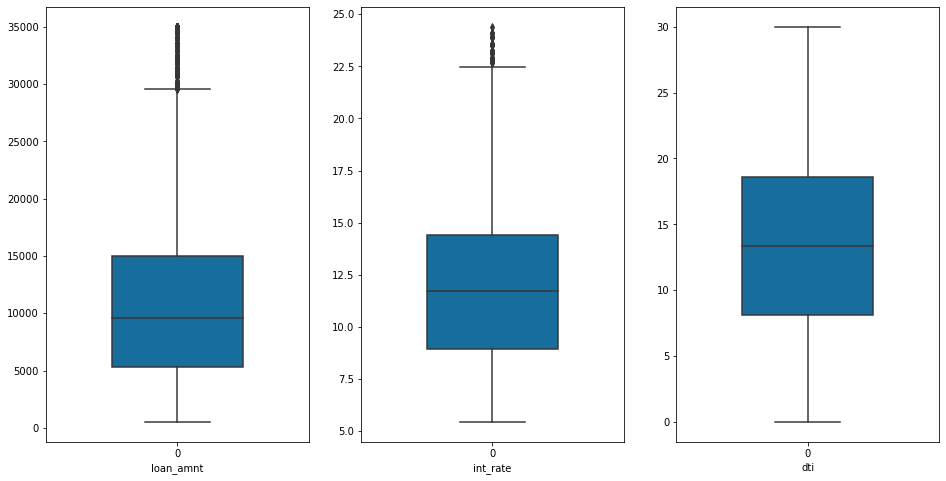

In [457]:
fig, axes = plt.subplots(1, 3, figsize=(16,8))  #Create subplots
#Plot boxplots for variables
sns.boxplot(ax=axes[0],data=df7.loan_amnt, width=0.5,palette="colorblind").set(xlabel='loan_amnt')
sns.boxplot(ax=axes[1],data=df7.int_rate, width=0.5,palette="colorblind").set(xlabel='int_rate')
sns.boxplot(ax=axes[2],data=df7.dti, width=0.5,palette="colorblind").set(xlabel='dti')

From the boxplots, I detected that the variables 'loan_amnt', 'int_rate','installment' have outliers.

In [458]:
#Define a function removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [459]:
# Remove outliers
df8=remove_outlier(df7,'loan_amnt') 
df8=remove_outlier(df7,'int_rate')


Data analysis

1. For each applicant, the presure to repay the loan is not only linked with his applied loan amount, but also with terms, interest rate and annual income. Thus, I create a variable - iti is a business-driven metric that stands for installment to income ratio in percentage. It follows the equation: iti= 100*(loan_amnt/term*(1+int_rate/12)/(annual_inc/12))

iti is a continuous variable, we will perform binning and then conduct univariate analysis. 




In [460]:
df8['iti']=100*(df8['loan_amnt']/df8['term']*(1+df8['int_rate']/12)/(df8['annual_inc']/12)) #Add a column that Calculates iti in percentage

<ipython-input-460-3657fb0142de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['iti']=100*(df8['loan_amnt']/df8['term']*(1+df8['int_rate']/12)/(df8['annual_inc']/12)) #Add a column that Calculates iti in percentage


Text(0.5, 1.0, 'Default rate by installment to income')

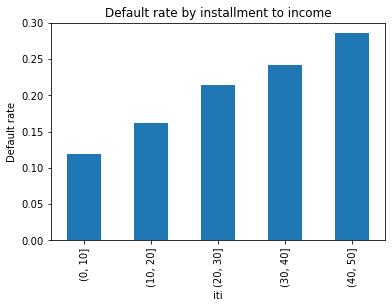

In [461]:
bins = pd.cut(df8['iti'], [0,10,20,30,40,50])   # Binning 
temp=df8.groupby(bins)['loan_status'].mean()  #Calculate default rate after groupby bins of iti
ax=temp.plot.bar()                          #BarPlot
ax.set_ylabel("Default rate")               #Set labels
ax.set_title('Default rate by installment to income')         #set title

Insight:
- Default rate generally increases with the increased value of iti, which suggests that the increased pressure of loan installment relative to income are associated with the increased likelihood of default.


Recommendations:
- The company should set priority and approve loans with low installment to income ratio first. 
- The company should try to lower installment to income when approving loans, via either lowering funded loan amount or extend loan term from 36 to 60 months. 


2. Bivariate analysis on the variables 'grade' and 'sub_grade' with default rate. I noticed that the first letter in 'sub_grade' repeats the value in 'grade', thus I will clean the variable 'sub_grade' first. 

In [462]:
#Drop the first letter in sub_grade
df8.loc[:,'sub_grade']=df8['sub_grade'].apply(lambda x: str(x)[1])

C:\Python\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Text(0.5, 1.0, 'Default rate by grades and subgrades')

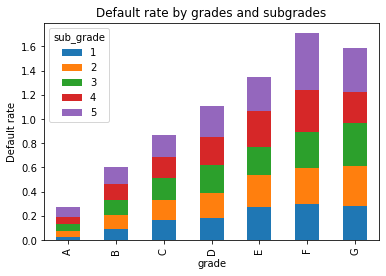

In [463]:
#Caulculate default rate grouping by grade first and sub_grade second
temp0=df8.groupby(['grade','sub_grade'])['loan_status'].mean().unstack('sub_grade')
#Plot stacked barchart
ax0=temp0.plot(kind='bar', stacked=True)
ax0.set_ylabel("Default rate")               #Set labels
ax0.set_title('Default rate by grades and subgrades')         #set title

Insights:
- With grade becoming lower(A to G), default rate generally becomes higher
- In each grade, with subgrade becoming lower(1 to 5), default rate generally becomes higher


Recommendations:
- The company should prioritize loaner with higher grade. (Specific priority: A-B-C-D-E-G-F)
- For applicants within the same grade, the company should prioritize loaner with higher subgrade.(Specific priority: 1-2-3-4-5)


3. Univariate analysis on continuous variables after binning


Text(0.5, 1.0, 'Default rate by employment length')

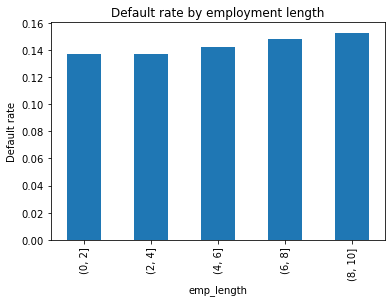

In [464]:
# For the variable emp_length
bins = pd.cut(df8['emp_length'], [0,2,4,6,8,10])   # Binning 
temp1=df8.groupby(bins)['loan_status'].mean() #Caulculate default rate by different employed months
ax1=temp1.plot.bar()                          #BarPlot
ax1.set_ylabel("Default rate")               #Set labels
ax1.set_title('Default rate by employment length')         #set title


Insight:
- When the value of emp_length becomes larger, the default rate becomes higher accordingly

Recommendation:
- The company should prioritize when approving loans with applicants that have been working less years.

Text(0.5, 1.0, 'Default rate by dti')

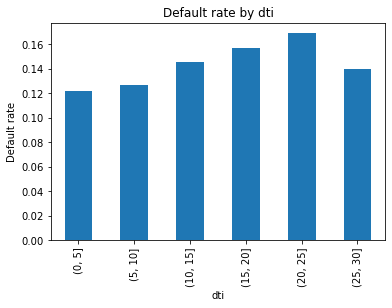

In [465]:
#For the variable dti
bins = pd.cut(df8['dti'], [0,5,10,15,20,25,30])   # Binning 
temp2=df8.groupby(bins)['loan_status'].mean() #Caulculate default rate by different dti
ax2=temp2.plot.bar()                          #BarPlot
ax2.set_ylabel("Default rate")               #Set labels
ax2.set_title('Default rate by dti')         #set title


Insight:
- Default rate increases with higher value of dti
- The sudden drop of default rate in (25,30] may due to significantly fewer observations compared to other groups 

Recommendation:
-  When approving loans, the company should prioritize applicants with relatively lower dti.

4 Univariate analysis on categorical varibles

Text(0.5, 1.0, 'Default rate for different issue months')

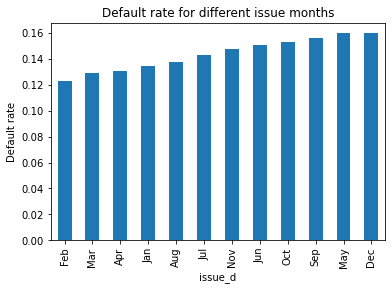

In [466]:
#For the variable 'issue_d'
temp3=df8.groupby('issue_d')['loan_status'].mean().sort_values() #Caulculate default rate by different issue months
ax3=temp3.plot.bar()                          #BarPlot
ax3.set_ylabel("Default rate")               #Set labels
ax3.set_title('Default rate for different issue months')         #set title

Insights:
- The variable 'issue_d' should be a driving variable behind loan default since the default rate varies with different issue months.
- loan applicants will have a relative higher default rate when the issue date is in May and later than September.





Recommendations:
- The company can consider issue less times of loan/ decrease loan_amount when it is in May or reaching the 4th quarter of the year (later than September)
- The company can prioritize applicants based on Month orders presented in the chart.

Text(0.5, 1.0, 'Default rate by home ownership')

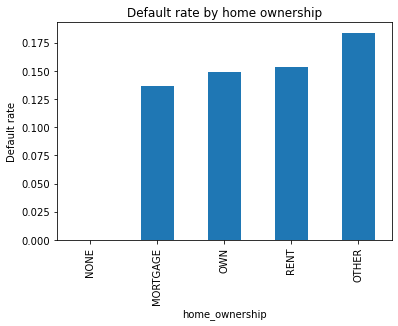

In [467]:
#For the variable home_ownership 
temp4=df8.groupby('home_ownership')['loan_status'].mean().sort_values() #Caulculate default rate for different types of home_ownership
ax4=temp4.plot.bar()                          #BarPlot
ax4.set_ylabel("Default rate")
ax4.set_title('Default rate by home ownership')

Insights:
- Default rate varies with different types of home ownership.
- The type 'OTHER' shows the highest default rate

Recommendations:
- Prioritize applicants based on type orders presented in the chart.
- For applicants with 'OTHER' type home ownership, check values of other driving variables  

Text(0.5, 1.0, 'Default rate by verification status')

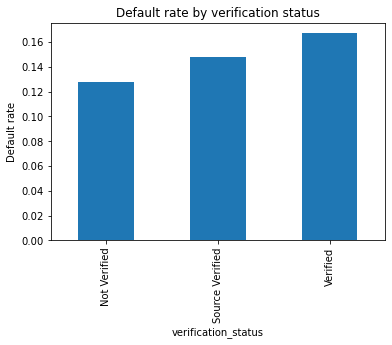

In [468]:
#For the variable verification_status:
temp5=df8.groupby('verification_status')['loan_status'].mean().sort_values() #Caulculate default rate for different types of verification status
ax5=temp5.plot.bar()                          #BarPlot
ax5.set_ylabel("Default rate")
ax5.set_title('Default rate by verification status')


Insights:
- Default rate varies with different types of verification status
- Not verified scores lower default rate than source verified and verified. 

Recommendations:
- Overhaul the current verificaiton process. Conduct more thorough check.
- For verified applicants, refrain from approving large amount of loan or short loan term.  

Text(0.5, 1.0, 'Default rate by purpose')

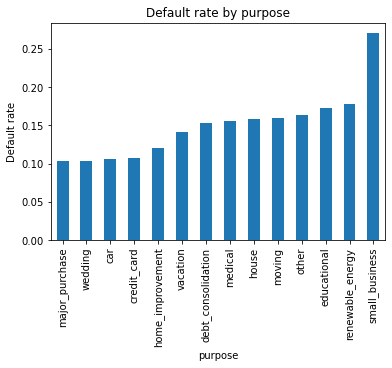

In [469]:
#For the variable purpose
temp6=df8.groupby('purpose')['loan_status'].mean().sort_values() #Caulculate default rate for different types of purpose
ax6=temp6.plot.bar()                          #BarPlot
ax6.set_ylabel("Default rate")
ax6.set_title('Default rate by purpose')


Insight:
-  Default rate varies with different types of purpose. 
- Loaning  for starting small business has relatively high default rate compared to others

Recommendation:
- For applicants borrowing money to start small businesses, the company should be cautious when approving. It can also consider approve lower amount of loan, lower interest rate, and shorten loan terms  

Text(0.5, 1.0, 'Default rate by state')

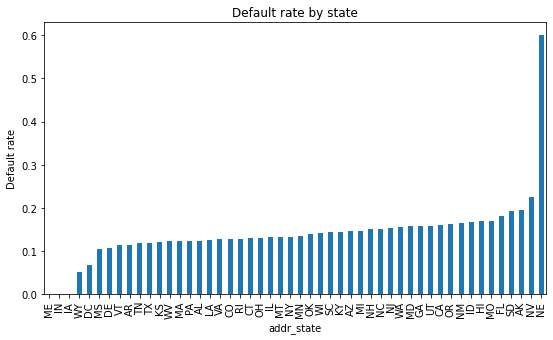

In [470]:
#For the variable addr_state
temp7=df8.groupby('addr_state')['loan_status'].mean().sort_values() #Caulculate default rate for different types of state
ax7=temp7.plot.bar(figsize=(9,5))                          #BarPlot
ax7.set_ylabel("Default rate")
ax7.set_title('Default rate by state')


Insight:
- Applicants from Nebraska have exceptionally high default rate (above 0.5)

Recommendation:
- The company had better reject applicants from the state Nebraska

Text(0.5, 1.0, 'Default rate by public bankruptcy record')

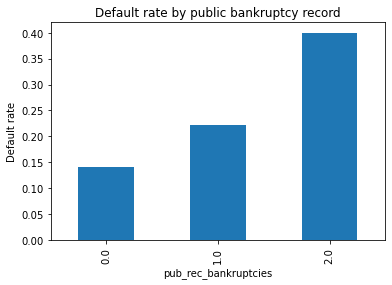

In [471]:
#For the variable pub_rec_bankruptcies
temp8=df8.groupby('pub_rec_bankruptcies')['loan_status'].mean().sort_values() #Caulculate default rate for different types of public bankruptcy record
ax8=temp8.plot.bar()                          #BarPlot
ax8.set_ylabel("Default rate")
ax8.set_title('Default rate by public bankruptcy record')



Insight:
- Default rate increases with the increased value of public bankruptcy record

Recommendation:
- The company should prioritize applicants without public bankrupticy record. 
- For applicants with public bankrupticy record, the company should consider rejecting , increaseing interest rate, lowering approved loan amount or shortening loan term.